In [70]:
import seaborn as sns
import pandas as pd
import numpy as np
import bs4
import requests
import datetime
import zipfile
import matplotlib as plt

In [71]:
with zipfile.ZipFile('60237682.zip') as z:
    print(z.namelist())

['data/MSI.csv', 'data/KMX.csv', 'data/DVN.csv', 'data/IPG.csv']


In [72]:
with zipfile.ZipFile('60237682.zip') as z:
    with z.open('data/MSI.csv') as f:
        MSI = pd.read_csv(f)
    with z.open('data/KMX.csv') as f:
        KMX = pd.read_csv(f)
    with z.open('data/DVN.csv') as f:
        DVN = pd.read_csv(f)
    with z.open('data/IPG.csv') as f:
        IPG = pd.read_csv(f)

In [73]:
MSI["company"] = "MSI"
KMX["company"] = "KMX"
DVN["company"] = "DVN"
IPG["company"] = "IPG"


In [74]:
data = pd.concat([MSI, KMX, DVN, IPG])

In [75]:
data = data.set_index("Date")

TASK1

In [76]:
result = []

for i in ["MSI", "KMX", "DVN", "IPG"]:
    counter = 0
    help = data[data["company"] == i]
    for i in range(1, len(help)):
        if help["Open"][i] == help["Close"][i]:
            counter += 1
    if counter == len(help):
        result.append(i)

C:\Users\Dario Mikuš\AppData\Local\Temp\ipykernel_11980\1448289988.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if help["Open"][i] == help["Close"][i]:


In [77]:
print(result)

[]


TASK2

In [78]:
data.groupby("company")["Close"].agg(["min", "max"])

,min,max
company,,
DVN,4.110,69.348
IPG,10.490,35.567
KMX,44.270,154.850
MSI,68.604,266.323


TASK3

In [79]:
data['log_return'] = np.log1p(data.Close.pct_change())

In [80]:
distr = data.groupby("company")["log_return"].agg(["min", "max", "mean", "median"])

In [81]:
distr

,min,max,mean,median
company,,,,
DVN,-0.571710,0.191203,-0.000051,0.000566
IPG,-1.174851,0.136966,-0.000393,0.000889
KMX,-1.359856,0.166118,-0.000942,0.000808
MSI,-0.127353,0.132083,0.000812,0.001443


TASK4

In [82]:
data.groupby("company")["log_return"].agg(["idxmax", "idxmin"])

,idxmax,idxmin
company,,
DVN,2020-03-19,2017-01-03
IPG,2020-03-24,2017-01-03
KMX,2020-03-24,2017-01-03
MSI,2019-02-08,2020-03-12


TASK5

In [83]:
data = data.reset_index()

In [84]:
data["YW"] = pd.to_datetime(data["Date"]).dt.strftime('%Y_%W')

In [85]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company,log_return,YW
0,2017-01-03,73.971,74.441,73.643,74.157,1029000,0.0,0.0,MSI,NaN,2017_01
1,2017-01-04,74.113,74.450,73.731,74.060,778200,0.0,0.0,MSI,-0.001309,2017_01
2,2017-01-05,73.838,74.184,72.738,73.306,734700,0.0,0.0,MSI,-0.010233,2017_01
3,2017-01-06,73.519,73.989,73.190,73.527,587700,0.0,0.0,MSI,0.003010,2017_01
4,2017-01-09,73.527,73.723,73.252,73.643,853300,0.0,0.0,MSI,0.001576,2017_02


In [86]:
data.groupby(["company", "YW"])[["Volume"]].mean()

Volume
company YW                
DVN     2017_01  5060425.0
        2017_02  4378320.0
        2017_03  3301075.0
        2017_04  3781580.0
        2017_05  3656160.0
...                    ...
MSI     2022_48   860760.0
        2022_49   546220.0
        2022_50   846000.0
        2022_51   467620.0
        2022_52   311150.0

[1260 rows x 1 columns]

TASK6

In [87]:
data["Gains"] = data["Close"] - data["Open"]

In [88]:
data.groupby("company")[["Gains"]].sum()

,Gains
company,
DVN,-23.362
IPG,0.088
KMX,-2.710
MSI,55.037


In [89]:
data.groupby("company")[["Open"]].first()

,Open
company,
DVN,34.186
IPG,17.506
KMX,65.030
MSI,73.971


In [90]:
#MSI

TASK7

PROBLEM 2

In [91]:
df = pd.read_csv("https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv")

TASK1

In [92]:
df["included"].isnull().sum()

45

TASK2

In [93]:
df = df[df["included"].isna() == False]

In [94]:
from datetime import datetime as dt

In [95]:
df["included"] = pd.to_datetime (df["included"], dayfirst=True, errors='coerce')

In [96]:
df["age"] = np.nan

In [97]:
df.head()

,Symbol,Security,GICS_Sector,hq,included,Founded,age
0,MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902,NaN
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916,NaN
2,ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888,NaN
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013 (1888),NaN
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981,NaN


In [98]:
df["age"] = (pd.to_datetime("now") - df["included"])

In [99]:
df['age']=df['age']//np.timedelta64(1,'D')    

In [100]:
df = df.set_index("Symbol")

In [101]:
df["age"].agg(["idxmin", "idxmax"])

idxmin    ACGL
idxmax      MO
Name: age, dtype: object

In [102]:
df["age"].mean()

8570.7010989011

TASK3

In [103]:
df.head()

,Security,GICS_Sector,hq,included,Founded,age
Symbol,,,,,,
MMM,3M,Industrials,"Saint Paul, Minnesota",1976-08-09,1902,17640.0
AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",2017-07-26,1916,2679.0
ABT,Abbott,Health Care,"North Chicago, Illinois",1964-03-31,1888,22154.0
ABBV,AbbVie,Health Care,"North Chicago, Illinois",2012-12-31,2013 (1888),4347.0
ABMD,Abiomed,Health Care,"Danvers, Massachusetts",2018-05-31,1981,2370.0


In [104]:
distr = df.groupby("GICS_Sector")[["Security"]].count()

In [105]:
distr

,Security
GICS_Sector,
Communication Services,23
Consumer Discretionary,52
Consumer Staples,33
Energy,22
Financials,55
Health Care,60
Industrials,66
Information Technology,68
Materials,26


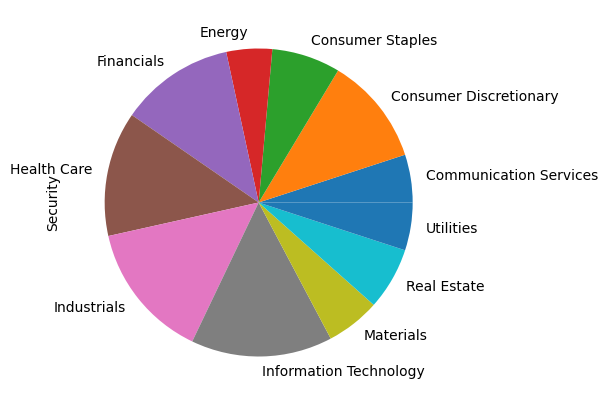

In [106]:
plot = distr.plot.pie(y='Security', figsize=(55, 5), legend=False)

TASK4

In [108]:
df["state"] = np.nan

In [109]:
for i in range(0,len(df)):
    input_str = df["hq"][i]
    df["state"][i] = input_str[input_str.rindex(','):]

C:\Users\Dario Mikuš\AppData\Local\Temp\ipykernel_11980\1231842559.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  input_str = df["hq"][i]
C:\Users\Dario Mikuš\AppData\Local\Temp\ipykernel_11980\1231842559.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment i

In [110]:
distr = df.groupby("state")[["state"]].count()

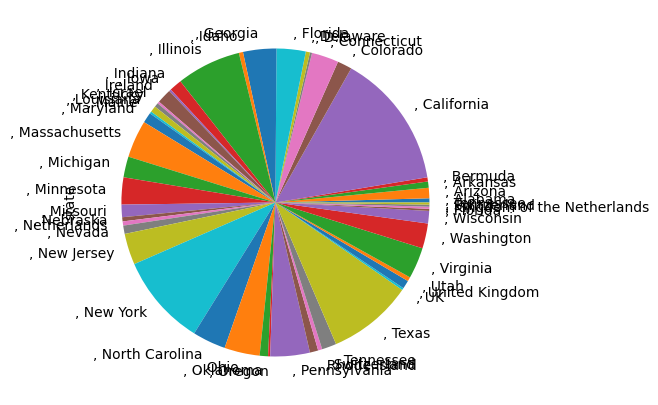

In [111]:
plot = distr.plot.pie(y='state', figsize=(55, 5), legend=False)